In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import json
import math
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge

In [2]:
pd.set_option('display.max_columns', None)  #Setting the output view to show all the columns

# Data Preprocessing
The data from the .pkl files is imported and read as df0, df1,..,df6 for seven datasets. .head(-2) is used to see the top five and bottom five rows of the dataset to understand the consistentency in the data.

In [3]:
df0= pd.read_pickle('dataset.pkl')
df0.head(-5)

surfaceProcessingLocationCavity hotRunner hotRunnerCost  \
0      55c4af00-0439-40aa-ab0a-4f1a0fa16882         1         40000   
1      55c4af00-0439-40aa-ab0a-4f1a0fa16882         1         40000   
2      55c4af00-0439-40aa-ab0a-4f1a0fa16882         0         40000   
3      55c4af00-0439-40aa-ab0a-4f1a0fa16882         1         10000   
4      55c4af00-0439-40aa-ab0a-4f1a0fa16882         0         25000   
...                                     ...       ...           ...   
11654  55c4af00-0439-40aa-ab0a-4f1a0fa16882         1         25000   
11655  55c4af00-0439-40aa-ab0a-4f1a0fa16882         0         25000   
11656  55c4af00-0439-40aa-ab0a-4f1a0fa16882         0         25000   
11657  55c4af00-0439-40aa-ab0a-4f1a0fa16882         0         25000   
11658  55c4af00-0439-40aa-ab0a-4f1a0fa16882         1         10000   

      manufacturingCost mouldValidationCost designTime hourlyDesignCost  \
0                 40000                1500         40               65   
1                 25000                3000         70               50   
2                 40000                4500        100               65   
3                 25000                4500         70               50   
4                 25000                3000         40               65   
...                 ...                 ...        ...              ...   
11654             25000                4500         70               65   
11655             25000                3000         70               50   
11656             25000                4500         40               50   
11657             40000                4500         40               50   
11658             55000                4500        100               50   

      removedChassis weightChassisProcessed  \
0               0.20                 6.6725   
1               0.15                 6.6725   
2               0.20                 6.6725   
3               0.18                 6.6725   
4               0.18                 6.6725   
...              ...                    ...   
11654           0.20                 6.6725   
11655           0.15                 6.6725   
11656           0.18                 6.6725   
11657           0.18                 6.6725   
11658           0.15                 6.6725   

           surfaceProcessingLocationChassis removedCavity numberOfCavities  \
0      35e16aba-caff-4fc6-a8ed-ec620c0da77f           0.5               32   
1      35e16aba-caff-4fc6-a8ed-ec620c0da77f           0.5               16   
2      35e16aba-caff-4fc6-a8ed-ec620c0da77f           0.3               32   
3      35e16aba-caff-4fc6-a8ed-ec620c0da77f           0.5               32   
4      35e16aba-caff-4fc6-a8ed-ec620c0da77f           0.3               32   
...                                     ...           ...              ...   
11654  35e16aba-caff-4fc6-a8ed-ec620c0da77f           0.5               32   
11655  35e16aba-caff-4fc6-a8ed-ec620c0da77f           0.5                4   
11656  35e16aba-caff-4fc6-a8ed-ec620c0da77f           0.5                4   
11657  35e16aba-caff-4fc6-a8ed-ec620c0da77f           0.3                4   
11658  35e16aba-caff-4fc6-a8ed-ec620c0da77f           0.5                4   

      weightCavityProcessed weightMould totalTransportationPercentage  \
0      0.005495000000000001    6.677995                           100   
1      0.005495000000000001    6.677995                           100   
2      0.005495000000000001    6.677995                           100   
3      0.005495000000000001    6.677995                           100   
4      0.005495000000000001    6.677995                           100   
...                     ...         ...                           ...   
11654  0.005495000000000001    6.677995                           100   
11655  0.005495000000000001    6.677995                           100   
11656  0.005495000000000001    6.677995                           100   
11657  0.00549500000000000

In [4]:
df1= pd.read_pickle('dataset_1.pkl')
df1.head(-5)

nProdottiAnno Cost designTime  \
0      55c4af00-0439-40aa-ab0a-4f1a0fa16882    0      10000   
1      55c4af00-0439-40aa-ab0a-4f1a0fa16882    0      10000   
2      55c4af00-0439-40aa-ab0a-4f1a0fa16882    0      10000   
3      55c4af00-0439-40aa-ab0a-4f1a0fa16882    0      10000   
4      55c4af00-0439-40aa-ab0a-4f1a0fa16882    0      10000   
...                                     ...  ...        ...   
30608  55c4af00-0439-40aa-ab0a-4f1a0fa16882    0      10000   
30609  55c4af00-0439-40aa-ab0a-4f1a0fa16882    0      10000   
30610  55c4af00-0439-40aa-ab0a-4f1a0fa16882    0      10000   
30611  55c4af00-0439-40aa-ab0a-4f1a0fa16882    0      10000   
30612  55c4af00-0439-40aa-ab0a-4f1a0fa16882    0      10000   

      ecosystem quality - land occupation  \
0                                   55000   
1                                   40000   
2                                   55000   
3                                   25000   
4                                   55000   
...                                   ...   
30608                               55000   
30609                               25000   
30610                               25000   
30611                               25000   
30612                               40000   

      human health - ozone layer depletion human health - ionising radiation  \
0                                     1500                                40   
1                                     1500                                40   
2                                     1500                                40   
3                                     1500                                40   
4                                     1500                                40   
...                                    ...                               ...   
30608                                 1500                                40   
30609                                 1500                                40   
30610                                 1500                                40   
30611                                 1500                                40   
30612                                 1500                                40   

      injectedMaterialCost maintenanceCost human health - total  \
0                       50            0.15               6.6725   
1                       50            0.15               6.6725   
2                       50            0.15               6.6725   
3                       50            0.15               6.6725   
4                       50            0.15               6.6725   
...                    ...             ...                  ...   
30608                   50            0.15               6.6725   
30609                   50            0.15               6.6725   
30610                   50            0.15               6.6725   
30611                   50            0.15               6.6725   
30612                   50            0.15               6.6725   

                           numberOfCavities warmupTime cycleTime  \
0      35e16aba-caff-4fc6-a8ed-ec620c0da77f        0.3         1   
1      35e16aba-caff-4fc6-a8ed-ec620c0da77f        0.3         1   
2      35e16aba-caff-4fc6-a8ed-ec620c0da77f        0.3         1   
3      35e16aba-caff-4fc6-a8ed-ec620c0da77f        0.3         1   
4      35e16aba-caff-4fc6-a8ed-ec620c0da77f        0.3         1   
...                                     ...        ...       ...   
30608  35e16aba-caff-4fc6-a8ed-ec620c0da77f        0.3         1   
30609  35e16aba-caff-4fc6-a8ed-ec620c0da77f        0.3         1   
30610  35e16aba-caff-4fc6-a8ed-ec620c0da77f        0.3         1   
30611  35e16aba-caff-4fc6-a8ed-ec620c0da77f        0.3         1   
30612  35e16aba-caff-4fc6-a8ed-ec620c0da77f        0.3         1   

          mouldMaterialName climate change - total transportCost  \
0      0.005495000000000001               6.677995           100   
1      0.0054

In [5]:
df2= pd.read_pickle('dataset_2.pkl')
df2.head(-8501)

resources - non-renewable energy removedChassis machineCycleTime  \
0      55c4af00-0439-40aa-ab0a-4f1a0fa16882              0            10000   
1      55c4af00-0439-40aa-ab0a-4f1a0fa16882              0            10000   
2      55c4af00-0439-40aa-ab0a-4f1a0fa16882              0            10000   
3      55c4af00-0439-40aa-ab0a-4f1a0fa16882              0            10000   
4      55c4af00-0439-40aa-ab0a-4f1a0fa16882              0            10000   
...                                     ...            ...              ...   
11663  55c4af00-0439-40aa-ab0a-4f1a0fa16882              0            10000   
11664                              0.001789              1               10   
11665                              0.002491              1               10   
11666                               0.00223              1               10   
11667                               0.00185              1               10   

      deliveryVolume maintenanceCost resources - mineral extraction  \
0              25000            1500                             40   
1              25000            1500                             40   
2              40000            1500                             40   
3              40000            1500                             40   
4              55000            1500                             40   
...              ...             ...                            ...   
11663          55000            1500                             40   
11664            100              25                       0.000018   
11665            100              25                       0.000019   
11666            100              25                       0.000019   
11667            100              25                       0.000018   

      ecosystem quality - terrestrial acidification & nutrification  \
0                                                     50              
1                                                     50              
2                                                     50              
3                                                     50              
4                                                     50              
...                                                  ...              
11663                                                 50              
11664                                                  0              
11665                                                  0              
11666                                                  0              
11667                                                  0              

      steelPrice human health - ozone layer depletion  \
0           0.15                               6.6725   
1           0.15                               6.6725   
2           0.15                               6.6725   
3           0.15                               6.6725   
4           0.15                               6.6725   
...          ...                                  ...   
11663       0.15                               6.6725   
11664          0                         69493.360588   
11665          0                         54493.360588   
11666          0                         82493.360588   
11667          0                         65493.360588   

                             deliveryPeriod gateDiameter mouldValidationCost  \
0      35e16aba-caff-4fc6-a8ed-ec620c0da77f          0.3                  32   
1      35e16aba-caff-4fc6-a8ed-ec620c0da77f          0.3                  32   
2      35e16aba-caff-4fc6-a8ed-ec620c0da77f          0.3                  32   
3      35e16aba-caff-4fc6-a8ed-ec620c0da77f          0.3                  16   
4      35e16aba-caff-4fc6-a8ed-ec620c0da77f          0.3                   4   
...                                     ...          ...                 ...   
11663  35e16aba-caff-4fc6-a8ed-ec620c0da77f          0.3                  32   
11664  8f10d917-79d3-48e6-a834-

In [7]:
df2_selected = df2.iloc[:11666]

In [8]:
df2_selected.head(-2)

resources - non-renewable energy removedChassis machineCycleTime  \
0      55c4af00-0439-40aa-ab0a-4f1a0fa16882              0            10000   
1      55c4af00-0439-40aa-ab0a-4f1a0fa16882              0            10000   
2      55c4af00-0439-40aa-ab0a-4f1a0fa16882              0            10000   
3      55c4af00-0439-40aa-ab0a-4f1a0fa16882              0            10000   
4      55c4af00-0439-40aa-ab0a-4f1a0fa16882              0            10000   
...                                     ...            ...              ...   
11659  55c4af00-0439-40aa-ab0a-4f1a0fa16882              0            10000   
11660  55c4af00-0439-40aa-ab0a-4f1a0fa16882              0            10000   
11661  55c4af00-0439-40aa-ab0a-4f1a0fa16882              0            10000   
11662  55c4af00-0439-40aa-ab0a-4f1a0fa16882              0            10000   
11663  55c4af00-0439-40aa-ab0a-4f1a0fa16882              0            10000   

      deliveryVolume maintenanceCost resources - mineral extraction  \
0              25000            1500                             40   
1              25000            1500                             40   
2              40000            1500                             40   
3              40000            1500                             40   
4              55000            1500                             40   
...              ...             ...                            ...   
11659          40000            1500                             40   
11660          55000            1500                             40   
11661          55000            1500                             40   
11662          40000            1500                             40   
11663          55000            1500                             40   

      ecosystem quality - terrestrial acidification & nutrification  \
0                                                     50              
1                                                     50              
2                                                     50              
3                                                     50              
4                                                     50              
...                                                  ...              
11659                                                 50              
11660                                                 50              
11661                                                 50              
11662                                                 50              
11663                                                 50              

      steelPrice human health - ozone layer depletion  \
0           0.15                               6.6725   
1           0.15                               6.6725   
2           0.15                               6.6725   
3           0.15                               6.6725   
4           0.15                               6.6725   
...          ...                                  ...   
11659       0.15                               6.6725   
11660       0.15                               6.6725   
11661       0.15                               6.6725   
11662       0.15                               6.6725   
11663       0.15                               6.6725   

                             deliveryPeriod gateDiameter mouldValidationCost  \
0      35e16aba-caff-4fc6-a8ed-ec620c0da77f          0.3                  32   
1      35e16aba-caff-4fc6-a8ed-ec620c0da77f          0.3                  32   
2      35e16aba-caff-4fc6-a8ed-ec620c0da77f          0.3                  32   
3      35e16aba-caff-4fc6-a8ed-ec620c0da77f          0.3                  16   
4      35e16aba-caff-4fc6-a8ed-ec620c0da77f          0.3                   4   
...                                     ...          ...                 ...   
11659  35e16aba-caff-4fc6-a8ed-ec620c0da77f          0.3                  16   
11660  35e16aba-caff-4fc6-a8ed-

In [9]:
df2=df2_selected

In [10]:
df3= pd.read_pickle('dataset_3.pkl')
df3.head(2)

maintenanceCost totalTransportationPercentage  \
0  55c4af00-0439-40aa-ab0a-4f1a0fa16882                             0   
1  55c4af00-0439-40aa-ab0a-4f1a0fa16882                             0   

  percentageLorry deliveryVolume removedCavity cycleTime human health - total  \
0           10000          55000          1500        40                   50   
1           10000          55000          1500        40                   50   

  climate change - total EUUSMacchina              injectionMouldingProcess  \
0                   0.15       6.6725  35e16aba-caff-4fc6-a8ed-ec620c0da77f   
1                   0.15       6.6725  35e16aba-caff-4fc6-a8ed-ec620c0da77f   

  materozzaVolume CNMacchina                  Cost  \
0             0.3          1  0.005495000000000001   
1             0.3          1  0.005495000000000001   

  resources - mineral extraction ecosystem quality - total numberOfCavities  \
0                       6.677995                       100                5   
1                       6.677995                       100                5   

  machineCycleTime hotRunnerCost mouldMaterialName mouldTotalCost  \
0               25            40                30           6850   
1               25            40                30           3450   

  resources - non-renewable energy                     resources - total  \
0                             4000  be308d91-fab4-43c9-bc66-726c5b033b86   
1                             4000  932e3143-0f29-4b07-a98a-8cd9507ec5d8   

  designTime ecosystem quality - aquatic ecotoxicity  \
0          9                                       1   
1          5                                       1   

  surfaceProcessingLocationCavity productVolume percentageRecycledMaterial  \
0                              50             3                         35   
1                               5             3                         35   

  totalDistance surfaceProcessingLocationChassis weightChassisProcessed  \
0             1                                1                      1   
1             1                                1                      1   

  removedChassis gateDiameter weightCavityProcessed weightMould runnersType  \
0        0.00095            0                     0         360          10   
1        0.00123            0                     0         360          10   

  injectedMaterial_product maxDepth                mouldDesignCostDisplay  \
0                     8000       12  be308d91-fab4-43c9-bc66-726c5b033b86   
1                     8000       12  932e3143-0f29-4b07-a98a-8cd9507ec5d8   

                              setupTime    percentageShip  \
0  5984ad89-00c1-446d-880c-dad9bbb81f02  094e332c4dcaacfd   
1  5984ad89-00c1-446d-880c-dad9bbb81f02  094e332c4dcaacfd   

  ecosystem quality - terrestrial acidification & nutrification  \
0                                                 -1              
1                                                 -1              

  surfaceFinishing ecosystem quality - terrestrial ecotoxicity  \
0             COLD                            95% PP + 5% PTFE   
1             COLD                          90% PA6 + 10% PTFE   

           hotRunner    percentageTrain injectedMaterialCost maxWallThickness  \
0  Horizontal 10 ton  Horizontal 10 ton    Horizontal 10 ton                1   
1  Horizontal 10 ton  Horizontal 10 ton    Horizontal 10 ton                1   

  human health - ionising radiation tolerance materialDensity steelPrice  \
0                                15        30              10          2   
1                                15        30              10          2   

  climate change - climate change ecosystem quality - land occupation  \
0                            2000                               38500   
1                            2000                               38500   

   nAnniProduzione  memtiEngineValue  mouldValidationCost  nProdottiAnno  \
0     80493.654588          0.

In [11]:
df4= pd.read_pickle('dataset_4.pkl')
df4.head(-2)

weightMould  \
0      55c4af00-0439-40aa-ab0a-4f1a0fa16882   
1      55c4af00-0439-40aa-ab0a-4f1a0fa16882   
2      55c4af00-0439-40aa-ab0a-4f1a0fa16882   
3      55c4af00-0439-40aa-ab0a-4f1a0fa16882   
4      55c4af00-0439-40aa-ab0a-4f1a0fa16882   
...                                     ...   
12621  55c4af00-0439-40aa-ab0a-4f1a0fa16882   
12622  55c4af00-0439-40aa-ab0a-4f1a0fa16882   
12623  55c4af00-0439-40aa-ab0a-4f1a0fa16882   
12624  55c4af00-0439-40aa-ab0a-4f1a0fa16882   
12625  55c4af00-0439-40aa-ab0a-4f1a0fa16882   

      ecosystem quality - terrestrial ecotoxicity maintenanceCost hotRunner  \
0                                               0           10000     25000   
1                                               0           10000     25000   
2                                               0           10000     25000   
3                                               0           10000     25000   
4                                               0           10000     25000   
...                                           ...             ...       ...   
12621                                           0           10000     25000   
12622                                           0           10000     25000   
12623                                           0           10000     25000   
12624                                           0           10000     25000   
12625                                           0           10000     25000   

      tolerance removedCavity weightCavityProcessed  \
0          1500            40                    50   
1          1500            40                    50   
2          1500            40                    50   
3          1500            40                    50   
4          1500            40                    50   
...         ...           ...                   ...   
12621      1500            40                    50   
12622      1500            40                    50   
12623      1500            40                    50   
12624      1500            40                    50   
12625      1500            40                    50   

      percentageRecycledMaterial designTime  \
0                           0.15     6.6725   
1                           0.15     6.6725   
2                           0.15     6.6725   
3                           0.15     6.6725   
4                           0.15     6.6725   
...                          ...        ...   
12621                       0.15     6.6725   
12622                       0.15     6.6725   
12623                       0.15     6.6725   
12624                       0.15     6.6725   
12625                       0.15     6.6725   

                                machineName warmupTime  \
0      35e16aba-caff-4fc6-a8ed-ec620c0da77f        0.3   
1      35e16aba-caff-4fc6-a8ed-ec620c0da77f        0.3   
2      35e16aba-caff-4fc6-a8ed-ec620c0da77f        0.3   
3      35e16aba-caff-4fc6-a8ed-ec620c0da77f        0.3   
4      35e16aba-caff-4fc6-a8ed-ec620c0da77f        0.3   
...                                     ...        ...   
12621  35e16aba-caff-4fc6-a8ed-ec620c0da77f        0.3   
12622  35e16aba-caff-4fc6-a8ed-ec620c0da77f        0.3   
12623  35e16aba-caff-4fc6-a8ed-ec620c0da77f        0.3   
12624  35e16aba-caff-4fc6-a8ed-ec620c0da77f        0.3   
12625  35e16aba-caff-4fc6-a8ed-ec620c0da77f        0.3   

      ecosystem quality - aquatic ecotoxicity  \
0                                           1   
1                                           1   
2                                           1   
3                                           1   
4                                           1   
...                                       ...   
12621                                       1   
12622                                       1   
12623                                       1   
12624                                       1   
12625                                       1   

      

In [12]:
df5= pd.read_pickle('dataset_5.pkl')
df5.head(-2)

hourlyDesignCost warmupTime mouldTotalCost  \
0      7c09041d-35fc-4e1a-905f-7499e3a81a8f          0          10000   
1      55c4af00-0439-40aa-ab0a-4f1a0fa16882          0          10000   
2      1c1e35f0-6355-42f5-92b4-8081fcc865f2          0          10000   
3      7c09041d-35fc-4e1a-905f-7499e3a81a8f          0          10000   
4      7c09041d-35fc-4e1a-905f-7499e3a81a8f          0          10000   
...                                     ...        ...            ...   
23321  7c09041d-35fc-4e1a-905f-7499e3a81a8f          0          10000   
23322  55c4af00-0439-40aa-ab0a-4f1a0fa16882          0          10000   
23323  55c4af00-0439-40aa-ab0a-4f1a0fa16882          0          10000   
23324  7c09041d-35fc-4e1a-905f-7499e3a81a8f          0          10000   
23325  7c09041d-35fc-4e1a-905f-7499e3a81a8f          0          10000   

      climate change - climate change percentageAircraft cycleTime  \
0                               25000               1500        40   
1                               25000               1500        40   
2                               25000               1500        40   
3                               25000               1500        40   
4                               25000               1500        40   
...                               ...                ...       ...   
23321                           25000               1500        40   
23322                           25000               1500        40   
23323                           25000               1500        40   
23324                           25000               1500        40   
23325                           25000               1500        40   

      mouldMaterialName resources - non-renewable energy machineName  \
0                    50                             0.15      6.6725   
1                    50                             0.15      6.6725   
2                    50                             0.15      6.6725   
3                    50                             0.15      6.6725   
4                    50                             0.15      6.6725   
...                 ...                              ...         ...   
23321                50                             0.15      6.6725   
23322                50                             0.15      6.6725   
23323                50                             0.15      6.6725   
23324                50                             0.15      6.6725   
23325                50                             0.15      6.6725   

                                 CNMacchina resources - mineral extraction  \
0      d65ad7e8-09d9-47b7-a1cb-9e3c5460b9a2                            0.3   
1      35e16aba-caff-4fc6-a8ed-ec620c0da77f                            0.3   
2      e52c3045-7a2a-44f7-9a3e-8ecc23d96345                            0.3   
3      d65ad7e8-09d9-47b7-a1cb-9e3c5460b9a2                            0.3   
4      d65ad7e8-09d9-47b7-a1cb-9e3c5460b9a2                            0.3   
...                                     ...                            ...   
23321  d65ad7e8-09d9-47b7-a1cb-9e3c5460b9a2                            0.3   
23322  35e16aba-caff-4fc6-a8ed-ec620c0da77f                            0.3   
23323  35e16aba-caff-4fc6-a8ed-ec620c0da77f                            0.3   
23324  d65ad7e8-09d9-47b7-a1cb-9e3c5460b9a2                            0.3   
23325  d65ad7e8-09d9-47b7-a1cb-9e3c5460b9a2                            0.3   

      ecosystem quality - land occupation injectedMaterial_product  \
0                                       1     0.005495000000000001   
1                                       1     0.005495000000000001   
2                                       1     0.005495000000000001   
3                                       1     0.005495000000000001   
4                                       1     0.005495000000000001   
...                                   ...                      ...   
23321            

In [13]:
df6= pd.read_pickle('dataset_6.pkl')
df6.head(-2)

machineCycleTime human health - human toxicity  \
0      55c4af00-0439-40aa-ab0a-4f1a0fa16882                             0   
1      1c1e35f0-6355-42f5-92b4-8081fcc865f2                             1   
2      55c4af00-0439-40aa-ab0a-4f1a0fa16882                             1   
3      7c09041d-35fc-4e1a-905f-7499e3a81a8f                             0   
4      55c4af00-0439-40aa-ab0a-4f1a0fa16882                             0   
...                                     ...                           ...   
52481  55c4af00-0439-40aa-ab0a-4f1a0fa16882                             1   
52482  7c09041d-35fc-4e1a-905f-7499e3a81a8f                             0   
52483  55c4af00-0439-40aa-ab0a-4f1a0fa16882                             1   
52484  55c4af00-0439-40aa-ab0a-4f1a0fa16882                             0   
52485  1c1e35f0-6355-42f5-92b4-8081fcc865f2                             0   

      mouldDesignCostDisplay climate change - total percentageAircraft  \
0                      25000                  40000               1500   
1                      10000                  25000               1500   
2                      40000                  55000               1500   
3                      25000                  40000               1500   
4                      25000                  25000               1500   
...                      ...                    ...                ...   
52481                  10000                  25000               1500   
52482                  40000                  55000               1500   
52483                  10000                  25000               1500   
52484                  10000                  40000               1500   
52485                  10000                  55000               1500   

      injectedMaterial_product EUUSMacchina designTime hotRunner  \
0                           40           50      0.225    6.6725   
1                           70           50       0.18    6.6725   
2                          100           50       0.18    6.6725   
3                          100           50      0.225    6.6725   
4                           70           50      0.225    6.6725   
...                        ...          ...        ...       ...   
52481                       40           50       0.15    6.6725   
52482                       70           50       0.18    6.6725   
52483                      100           50       0.18    6.6725   
52484                       40           50       0.15    6.6725   
52485                      100           50      0.225    6.6725   

                           numberOfCavities human health - ionising radiation  \
0      35e16aba-caff-4fc6-a8ed-ec620c0da77f                               0.3   
1      e52c3045-7a2a-44f7-9a3e-8ecc23d96345                               0.3   
2      35e16aba-caff-4fc6-a8ed-ec620c0da77f                               0.3   
3      d65ad7e8-09d9-47b7-a1cb-9e3c5460b9a2                               0.3   
4      35e16aba-caff-4fc6-a8ed-ec620c0da77f                               0.3   
...                                     ...                               ...   
52481  35e16aba-caff-4fc6-a8ed-ec620c0da77f                               0.3   
52482  d65ad7e8-09d9-47b7-a1cb-9e3c5460b9a2                               0.3   
52483  35e16aba-caff-4fc6-a8ed-ec620c0da77f                               0.3   
52484  35e16aba-caff-4fc6-a8ed-ec620c0da77f                               0.3   
52485  e52c3045-7a2a-44f7-9a3e-8ecc23d96345                               0.3   

      runnersType resources - non-renewable energy percentageTrain  \
0               1             0.005495000000000001        6.677995   
1               1             0.005495000000000001        6.677995   
2               1             0.005495000000000001        6.677995   
3               1             0.005495000000000001        6.677995   
4               1             0.005495000000000001        6.677995   
...

In [14]:
# Check the number of columns for each DataFrame
print("Number of columns in df0:", df0.shape[1])
print("Number of columns in df1:", df1.shape[1])
print("Number of columns in df2:", df2.shape[1])
print("Number of columns in df3:", df3.shape[1])
print("Number of columns in df4:", df4.shape[1])
print("Number of columns in df5:", df5.shape[1])
print("Number of columns in df6:", df6.shape[1])

Number of columns in df0: 70
Number of columns in df1: 70
Number of columns in df2: 70
Number of columns in df3: 70
Number of columns in df4: 70
Number of columns in df5: 70
Number of columns in df6: 70


In [15]:
# Concatenate the DataFrames
df_combined = pd.concat([df0, df1, df2, df3, df4, df5, df6], ignore_index=True)

# Display the result
df_combined.head(-11982)

surfaceProcessingLocationCavity hotRunner hotRunnerCost  \
0       55c4af00-0439-40aa-ab0a-4f1a0fa16882         1         40000   
1       55c4af00-0439-40aa-ab0a-4f1a0fa16882         1         40000   
2       55c4af00-0439-40aa-ab0a-4f1a0fa16882         0         40000   
3       55c4af00-0439-40aa-ab0a-4f1a0fa16882         1         10000   
4       55c4af00-0439-40aa-ab0a-4f1a0fa16882         0         25000   
...                                      ...       ...           ...   
152163                                    -1    6.6725            10   
152164                                    -1    6.6725            10   
152165                                    -1    6.6725            10   
152166                                    -1    6.6725            10   
152167                                    -1    6.6725            10   

       manufacturingCost mouldValidationCost designTime hourlyDesignCost  \
0                  40000                1500         40               65   
1                  25000                3000         70               50   
2                  40000                4500        100               65   
3                  25000                4500         70               50   
4                  25000                3000         40               65   
...                  ...                 ...        ...              ...   
152163                 2                 360       0.18                0   
152164                 2                 360      0.225                0   
152165                 2                 360       0.18                0   
152166                 2                 360      0.225                0   
152167                 2                 360      0.225                0   

       removedChassis weightChassisProcessed  \
0                0.20                 6.6725   
1                0.15                 6.6725   
2                0.20                 6.6725   
3                0.18                 6.6725   
4                0.18                 6.6725   
...               ...                    ...   
152163             50               0.002092   
152164             50               0.002779   
152165             50                0.00323   
152166             50               0.003336   
152167             50               0.002791   

            surfaceProcessingLocationChassis removedCavity  \
0       35e16aba-caff-4fc6-a8ed-ec620c0da77f           0.5   
1       35e16aba-caff-4fc6-a8ed-ec620c0da77f           0.5   
2       35e16aba-caff-4fc6-a8ed-ec620c0da77f           0.3   
3       35e16aba-caff-4fc6-a8ed-ec620c0da77f           0.5   
4       35e16aba-caff-4fc6-a8ed-ec620c0da77f           0.3   
...                                      ...           ...   
152163                                     5            30   
152164                                     5            30   
152165                                     5            30   
152166                                     5            30   
152167                                     5            30   

                            numberOfCavities weightCavityProcessed  \
0                                         32  0.005495000000000001   
1                                         16  0.005495000000000001   
2                                         32  0.005495000000000001   
3                                         32  0.005495000000000001   
4                                         32  0.005495000000000001   
...                                      ...                   ...   
152163  d65ad7e8-09d9-47b7-a1cb-9e3c5460b9a2    Horizontal 220 ton   
152164  e52c3045-7a2a-44f7-9a3e-8ecc23d96345     Horizontal 80 ton   
152165  35e16aba-caff-4fc6-a8ed-ec620c0da77f  Bi-component 100 ton   
152166  35e16aba-caff-4fc6-a8ed-ec620c0da77f    Horizontal 150 ton   
152167  d65ad7e8-09d9-47b7-a1cb-9e3c5460b9a2    Horizontal 120 ton   

       weightMould totalTransportationPercentage percentageAircraft  \
0

In [16]:
print("Number of columns in the concatenated DataFrame:", df_combined.shape[1])

Number of columns in the concatenated DataFrame: 70


In [17]:
df_combined.head(-2)

surfaceProcessingLocationCavity hotRunner hotRunnerCost  \
0       55c4af00-0439-40aa-ab0a-4f1a0fa16882         1         40000   
1       55c4af00-0439-40aa-ab0a-4f1a0fa16882         1         40000   
2       55c4af00-0439-40aa-ab0a-4f1a0fa16882         0         40000   
3       55c4af00-0439-40aa-ab0a-4f1a0fa16882         1         10000   
4       55c4af00-0439-40aa-ab0a-4f1a0fa16882         0         25000   
...                                      ...       ...           ...   
164143                                    -1    6.6725            10   
164144                                    -1    6.6725            10   
164145                                    -1    6.6725            10   
164146                                    -1    6.6725            10   
164147                                    -1    6.6725            10   

       manufacturingCost mouldValidationCost designTime hourlyDesignCost  \
0                  40000                1500         40               65   
1                  25000                3000         70               50   
2                  40000                4500        100               65   
3                  25000                4500         70               50   
4                  25000                3000         40               65   
...                  ...                 ...        ...              ...   
164143                 2                 360       0.15                0   
164144                 2                 360       0.18                0   
164145                 2                 360       0.18                0   
164146                 2                 360       0.15                0   
164147                 2                 360      0.225                0   

       removedChassis weightChassisProcessed  \
0                0.20                 6.6725   
1                0.15                 6.6725   
2                0.20                 6.6725   
3                0.18                 6.6725   
4                0.18                 6.6725   
...               ...                    ...   
164143             50               0.002575   
164144             50               0.002092   
164145             50               0.002645   
164146             50               0.003158   
164147             50               0.002707   

            surfaceProcessingLocationChassis removedCavity  \
0       35e16aba-caff-4fc6-a8ed-ec620c0da77f           0.5   
1       35e16aba-caff-4fc6-a8ed-ec620c0da77f           0.5   
2       35e16aba-caff-4fc6-a8ed-ec620c0da77f           0.3   
3       35e16aba-caff-4fc6-a8ed-ec620c0da77f           0.5   
4       35e16aba-caff-4fc6-a8ed-ec620c0da77f           0.3   
...                                      ...           ...   
164143                                     5            30   
164144                                     5            30   
164145                                     5            30   
164146                                     5            30   
164147                                     5            30   

                            numberOfCavities weightCavityProcessed  \
0                                         32  0.005495000000000001   
1                                         16  0.005495000000000001   
2                                         32  0.005495000000000001   
3                                         32  0.005495000000000001   
4                                         32  0.005495000000000001   
...                                      ...                   ...   
164143  35e16aba-caff-4fc6-a8ed-ec620c0da77f  Bi-component 100 ton   
164144  d65ad7e8-09d9-47b7-a1cb-9e3c5460b9a2    Horizontal 250 ton   
164145  35e16aba-caff-4fc6-a8ed-ec620c0da77f      Vertical 150 ton   
164146  35e16aba-caff-4fc6-a8ed-ec620c0da77f     Horizontal 50 ton   
164147  e52c3045-7a2a-44f7-9a3e-8ecc23d96345     Horizontal 20 ton   

       weightMould totalTransportationPercentage percentageAircraft  \
0

In [77]:
df= df_combined

In [76]:
df.to_csv('df_combined_F.csv', index=False)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164150 entries, 0 to 164149
Data columns (total 70 columns):
 #   Column                                                         Non-Null Count   Dtype 
---  ------                                                         --------------   ----- 
 0   surfaceProcessingLocationCavity                                164150 non-null  object
 1   hotRunner                                                      164150 non-null  object
 2   hotRunnerCost                                                  164150 non-null  object
 3   manufacturingCost                                              164150 non-null  object
 4   mouldValidationCost                                            164150 non-null  object
 5   designTime                                                     164150 non-null  object
 6   hourlyDesignCost                                               164150 non-null  object
 7   removedChassis                                          

In [85]:
df.describe()

surfaceProcessingLocationCavity hotRunner hotRunnerCost  \
count                                 164150    164150        164150   
unique                                     5         2             4   
top     55c4af00-0439-40aa-ab0a-4f1a0fa16882         0         10000   
freq                                  113604    132072        121380   

       manufacturingCost mouldValidationCost designTime hourlyDesignCost  \
count             164150              164150     164150           164150   
unique                 4                   4          5                3   
top                25000                1500         40               50   
freq               78663              156372     121380           158316   

       removedChassis weightChassisProcessed  \
count          164150                 164150   
unique              5                      3   
top              0.15                 6.6725   
freq           121380                 164148   

            surfaceProcessingLocationChassis removedCavity numberOfCavities  \
count                                 164150        164150           164150   
unique                                     4             5                6   
top     35e16aba-caff-4fc6-a8ed-ec620c0da77f           0.3                1   
freq                                  113604        156372           146652   

       weightCavityProcessed weightMould totalTransportationPercentage  \
count                 164150      164150                        164150   
unique                     3           3                             3   
top     0.005495000000000001    6.677995                           100   
freq                  164148      164148                        164148   

       percentageAircraft percentageLorry percentageTrain percentageShip  \
count              164150          164150          164150         164150   
unique                  3               2               2              2   
top                     5              25              40             30   
freq               164148          164148          164148         164148   

       totalDistance transportCost              injectedMaterial_product  \
count         164150        164150                                164150   
unique             4             2                                     9   
top               50          4000  8f10d917-79d3-48e6-a834-7e1edbfe1840   
freq          129278        164148                                111772   

       injectedMaterialCost percentageRecycledMaterial maxDepth  \
count                164150                     164150   164150   
unique                    4                          3        5   
top                       1                          0        5   
freq                 129254                      88444   129254   

       maxWallThickness productVolume materozzaVolume nAnniProduzione  \
count            164150        164150          164150          164150   
unique                3             4               4               3   
top                   1             5               0               1   
freq             137906        129252          111772          164148   

       nProdottiAnno materialDensity tolerance surfaceFinishing cycleTime  \
count         164150          164150    164150           164150    164150   
unique             3               8         4                4         2   
top                1         0.00105         0                0       360   
freq          146483          111772    155961           155909    164148   

       machineCycleTime maintenanceCost productionCost  \
count            164150          164150         164150   
unique                4               4             15   
top                  10            8000             12   
freq             140319          146212          80788   

                  injectedMaterial_materozza  \
count                                 164150   
unique                    

In [46]:
df.columns

Index(['surfaceProcessingLocationCavity', 'hotRunner', 'hotRunnerCost',
       'manufacturingCost', 'mouldValidationCost', 'designTime',
       'hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
       'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
       'weightCavityProcessed', 'weightMould', 'totalTransportationPercentage',
       'percentageAircraft', 'percentageLorry', 'percentageTrain',
       'percentageShip', 'totalDistance', 'transportCost',
       'injectedMaterial_product', 'injectedMaterialCost',
       'percentageRecycledMaterial', 'maxDepth', 'maxWallThickness',
       'productVolume', 'materozzaVolume', 'nAnniProduzione', 'nProdottiAnno',
       'materialDensity', 'tolerance', 'surfaceFinishing', 'cycleTime',
       'machineCycleTime', 'maintenanceCost', 'productionCost',
       'injectedMaterial_materozza', 'injectionMouldingProcess',
       'memtiEngineValue', 'steelPrice', 'runnersType', 'mouldMaterialName',
       'machineName',

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge

In [99]:
columns_to_convert = ['surfaceProcessingLocationCavity', 'surfaceProcessingLocationChassis', 
                      'injectedMaterial_product', 'injectedMaterial_materozza', 
                      'injectionMouldingProcess','memtiEngineValue', 'steelPrice', 
                      'runnersType', 'mouldMaterialName','machineName', 
                      'EUUSMacchina', 'CNMacchina']

#df[columns_to_convert] = df[columns_to_convert].astype(str)
df[df.columns] = df[df.columns].astype(str)

In [100]:
label_encoder = LabelEncoder()
df_encoded= df.copy()

In [101]:
for col in columns_to_convert:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col]).astype(float)

In [102]:
df_encoded.head(-5)

surfaceProcessingLocationCavity hotRunner hotRunnerCost  \
0                                   3.0         1         40000   
1                                   3.0         1         40000   
2                                   3.0         0         40000   
3                                   3.0         1         10000   
4                                   3.0         0         25000   
...                                 ...       ...           ...   
164140                              2.0         0         40000   
164141                              2.0         1         40000   
164142                              3.0         1         10000   
164143                              3.0         1         10000   
164144                              4.0         0         40000   

       manufacturingCost mouldValidationCost designTime hourlyDesignCost  \
0                  40000                1500         40               65   
1                  25000                3000         70               50   
2                  40000                4500        100               65   
3                  25000                4500         70               50   
4                  25000                3000         40               65   
...                  ...                 ...        ...              ...   
164140             25000                1500         40               50   
164141             55000                1500        100               50   
164142             25000                1500         40               50   
164143             25000                1500         40               50   
164144             55000                1500         70               50   

       removedChassis weightChassisProcessed  \
0                0.20                 6.6725   
1                0.15                 6.6725   
2                0.20                 6.6725   
3                0.18                 6.6725   
4                0.18                 6.6725   
...               ...                    ...   
164140           0.15                 6.6725   
164141           0.15                 6.6725   
164142           0.18                 6.6725   
164143           0.15                 6.6725   
164144           0.18                 6.6725   

        surfaceProcessingLocationChassis removedCavity numberOfCavities  \
0                                    0.0           0.5               32   
1                                    0.0           0.5               16   
2                                    0.0           0.3               32   
3                                    0.0           0.5               32   
4                                    0.0           0.3               32   
...                                  ...           ...              ...   
164140                               3.0           0.3                1   
164141                               3.0           0.3                1   
164142                               0.0           0.3                1   
164143                               0.0           0.3                1   
164144                               2.0           0.3                1   

       weightCavityProcessed weightMould totalTransportationPercentage  \
0       0.005495000000000001    6.677995                           100   
1       0.005495000000000001    6.677995                           100   
2       0.005495000000000001    6.677995                           100   
3       0.005495000000000001    6.677995                           100   
4       0.005495000000000001    6.677995                           100   
...                      ...         ...                           ...   
164140  0.005495000000000001    6.677995                           100   
164141  0.005495000000000001    6.677995                           100   
164142  0.005495000000000001    6.677995                           100   
164143  0.005495000000000001    6.677995                           100  

In [103]:
df_corr = df_encoded

In [120]:
# Check if the value exists anywhere in the DataFrame
value = 'Horizontal 10 ton'
exists = (df_corr == value).any().any()

print(f"Value exists: {exists}")
positions = df_corr.stack()[df_corr.stack() == value].index

# Print positions
for pos in positions:
    print(f"Value found at: {pos}")

Value exists: False


In [115]:
# Get distinct values in the 'Snowfall' column
distinct_values = df_encoded['percentageLorry'].unique()
distinct_values

array(['25', 'Horizontal 10 ton'], dtype=object)

In [116]:
df_encoded.drop(df_encoded[df_encoded['percentageLorry'] == 'Horizontal 10 ton'].index, inplace=True)

In [117]:
df_encoded[df_encoded.columns] = df_encoded[df_encoded.columns].astype(float)

In [118]:
df_corr[df_corr.columns] = df_corr[df_corr.columns].astype(float)

In [121]:
# Check if the value exists anywhere in the DataFrame
value = 'Horizontal 10 ton'
exists = (df_corr == value).any().any()

print(f"Value exists: {exists}")
positions = df_corr.stack()[df_corr.stack() == value].index

# Print positions
for pos in positions:
    print(f"Value found at: {pos}")

Value exists: False


In [119]:
df_corr.drop(index=54947)

surfaceProcessingLocationCavity  hotRunner  hotRunnerCost  \
0                                   3.0        1.0        40000.0   
1                                   3.0        1.0        40000.0   
2                                   3.0        0.0        40000.0   
3                                   3.0        1.0        10000.0   
4                                   3.0        0.0        25000.0   
...                                 ...        ...            ...   
164145                              3.0        1.0        10000.0   
164146                              3.0        0.0        10000.0   
164147                              2.0        0.0        10000.0   
164148                              2.0        1.0        40000.0   
164149                              2.0        0.0        25000.0   

        manufacturingCost  mouldValidationCost  designTime  hourlyDesignCost  \
0                 40000.0               1500.0        40.0              65.0   
1                 25000.0               3000.0        70.0              50.0   
2                 40000.0               4500.0       100.0              65.0   
3                 25000.0               4500.0        70.0              50.0   
4                 25000.0               3000.0        40.0              65.0   
...                   ...                  ...         ...               ...   
164145            25000.0               1500.0       100.0              50.0   
164146            40000.0               1500.0        40.0              50.0   
164147            55000.0               1500.0       100.0              50.0   
164148            55000.0               1500.0        70.0              50.0   
164149            25000.0               1500.0        70.0              50.0   

        removedChassis  weightChassisProcessed  \
0                0.200                  6.6725   
1                0.150                  6.6725   
2                0.200                  6.6725   
3                0.180                  6.6725   
4                0.180                  6.6725   
...                ...                     ...   
164145           0.180                  6.6725   
164146           0.150                  6.6725   
164147           0.225                  6.6725   
164148           0.150                  6.6725   
164149           0.225                  6.6725   

        surfaceProcessingLocationChassis  removedCavity  numberOfCavities  \
0                                    0.0            0.5              32.0   
1                                    0.0            0.5              16.0   
2                                    0.0            0.3              32.0   
3                                    0.0            0.5              32.0   
4                                    0.0            0.3              32.0   
...                                  ...            ...               ...   
164145                               0.0            0.3               1.0   
164146                               0.0            0.3               1.0   
164147                               3.0            0.3               1.0   
164148                               3.0            0.3               1.0   
164149                               3.0            0.3               1.0   

        weightCavityProcessed  weightMould  totalTransportationPercentage  \
0                    0.005495     6.677995                          100.0   
1                    0.005495     6.677995                          100.0   
2                    0.005495     6.677995                          100.0   
3                    0.005495     6.677995                          100.0   
4                    0.005495     6.677995                          100.0   
...                       ...          ...                            ...   
164145               0.005495     6.677995                          100.0   
164146               0.005495     6.677995                          100.0   

In [122]:
df_corr.head(53951)

surfaceProcessingLocationCavity  hotRunner  hotRunnerCost  \
0                                  3.0        1.0        40000.0   
1                                  3.0        1.0        40000.0   
2                                  3.0        0.0        40000.0   
3                                  3.0        1.0        10000.0   
4                                  3.0        0.0        25000.0   
...                                ...        ...            ...   
53948                              3.0        0.0        10000.0   
53949                              3.0        0.0        10000.0   
53950                              3.0        0.0        10000.0   
53951                              3.0        0.0        10000.0   
53952                              3.0        0.0        10000.0   

       manufacturingCost  mouldValidationCost  designTime  hourlyDesignCost  \
0                40000.0               1500.0        40.0              65.0   
1                25000.0               3000.0        70.0              50.0   
2                40000.0               4500.0       100.0              65.0   
3                25000.0               4500.0        70.0              50.0   
4                25000.0               3000.0        40.0              65.0   
...                  ...                  ...         ...               ...   
53948            55000.0               1500.0        40.0              50.0   
53949            55000.0               1500.0        40.0              50.0   
53950            55000.0               1500.0        40.0              50.0   
53951            55000.0               1500.0        40.0              50.0   
53952            55000.0               1500.0        40.0              50.0   

       removedChassis  weightChassisProcessed  \
0                0.20                  6.6725   
1                0.15                  6.6725   
2                0.20                  6.6725   
3                0.18                  6.6725   
4                0.18                  6.6725   
...               ...                     ...   
53948            0.15                  6.6725   
53949            0.15                  6.6725   
53950            0.15                  6.6725   
53951            0.15                  6.6725   
53952            0.15                  6.6725   

       surfaceProcessingLocationChassis  removedCavity  numberOfCavities  \
0                                   0.0            0.5              32.0   
1                                   0.0            0.5              16.0   
2                                   0.0            0.3              32.0   
3                                   0.0            0.5              32.0   
4                                   0.0            0.3              32.0   
...                                 ...            ...               ...   
53948                               0.0            0.3               1.0   
53949                               0.0            0.3               1.0   
53950                               0.0            0.3               1.0   
53951                               0.0            0.3               1.0   
53952                               0.0            0.3               1.0   

       weightCavityProcessed  weightMould  totalTransportationPercentage  \
0                   0.005495     6.677995                          100.0   
1                   0.005495     6.677995                          100.0   
2                   0.005495     6.677995                          100.0   
3                   0.005495     6.677995                          100.0   
4                   0.005495     6.677995                          100.0   
...                      ...          ...                            ...   
53948               0.005495     6.677995                          100.0   
53949               0.005495     6.677995                          100.0   
53950               0.005495     6.677995              

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [ ]:
input_variables= ['surfaceProcessingLocationCavity', 'hotRunner',
'hotRunnerCost','manufacturingCost', 'mouldValidationCost',
'designTime','hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
'weightCavityProcessed', 'weightMould',
'totalTransportationPercentage','percentageAircraft', 'percentageLorry', 'percentageTrain','percentageShip', 'totalDistance',
'injectedMaterial_product', 'injectedMaterialCost','percentageRecycledMaterial', 'maxDepth', 'maxWallThickness','productVolume', 'materozzaVolume', 'nAnniProduzione', 'nProdottiAnno',
 'materialDensity', 'tolerance', 'surfaceFinishing', 'cycleTime',
'machineCycleTime',
'maintenanceCost', 'productionCost','transportCost', 'mouldTotalCost',
'injectedMaterial_materozza', 'injectionMouldingProcess','memtiEngineValue', 'steelPrice', 'runnersType', 'mouldMaterialName',
'machineName', 'EUUSMacchina', 'CNMacchina', 'gateDiameter', 'setupTime', 'warmupTime', 'deliveryVolume', 'deliveryPeriod','mouldDesignCostDisplay']

output_variables= ['human health - total', 
                   'ecosystem quality - total',
                    'resources - total', 
                      'Cost'
                      ]

In [ ]:
# scaling the data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns, index=df_encoded.index)

In [126]:
data=df_encoded.corr(numeric_only=False)
plt.figure(figsize = (200,100))
sns.heatmap(data=data, cmap="YlGnBu", annot=True)

<Axes: >

In [131]:
# Drop columns and rows with all NaN values
cleaned_corr_matrix = data.dropna(axis=1, how='all').dropna(axis=0, how='all')

<Axes: >

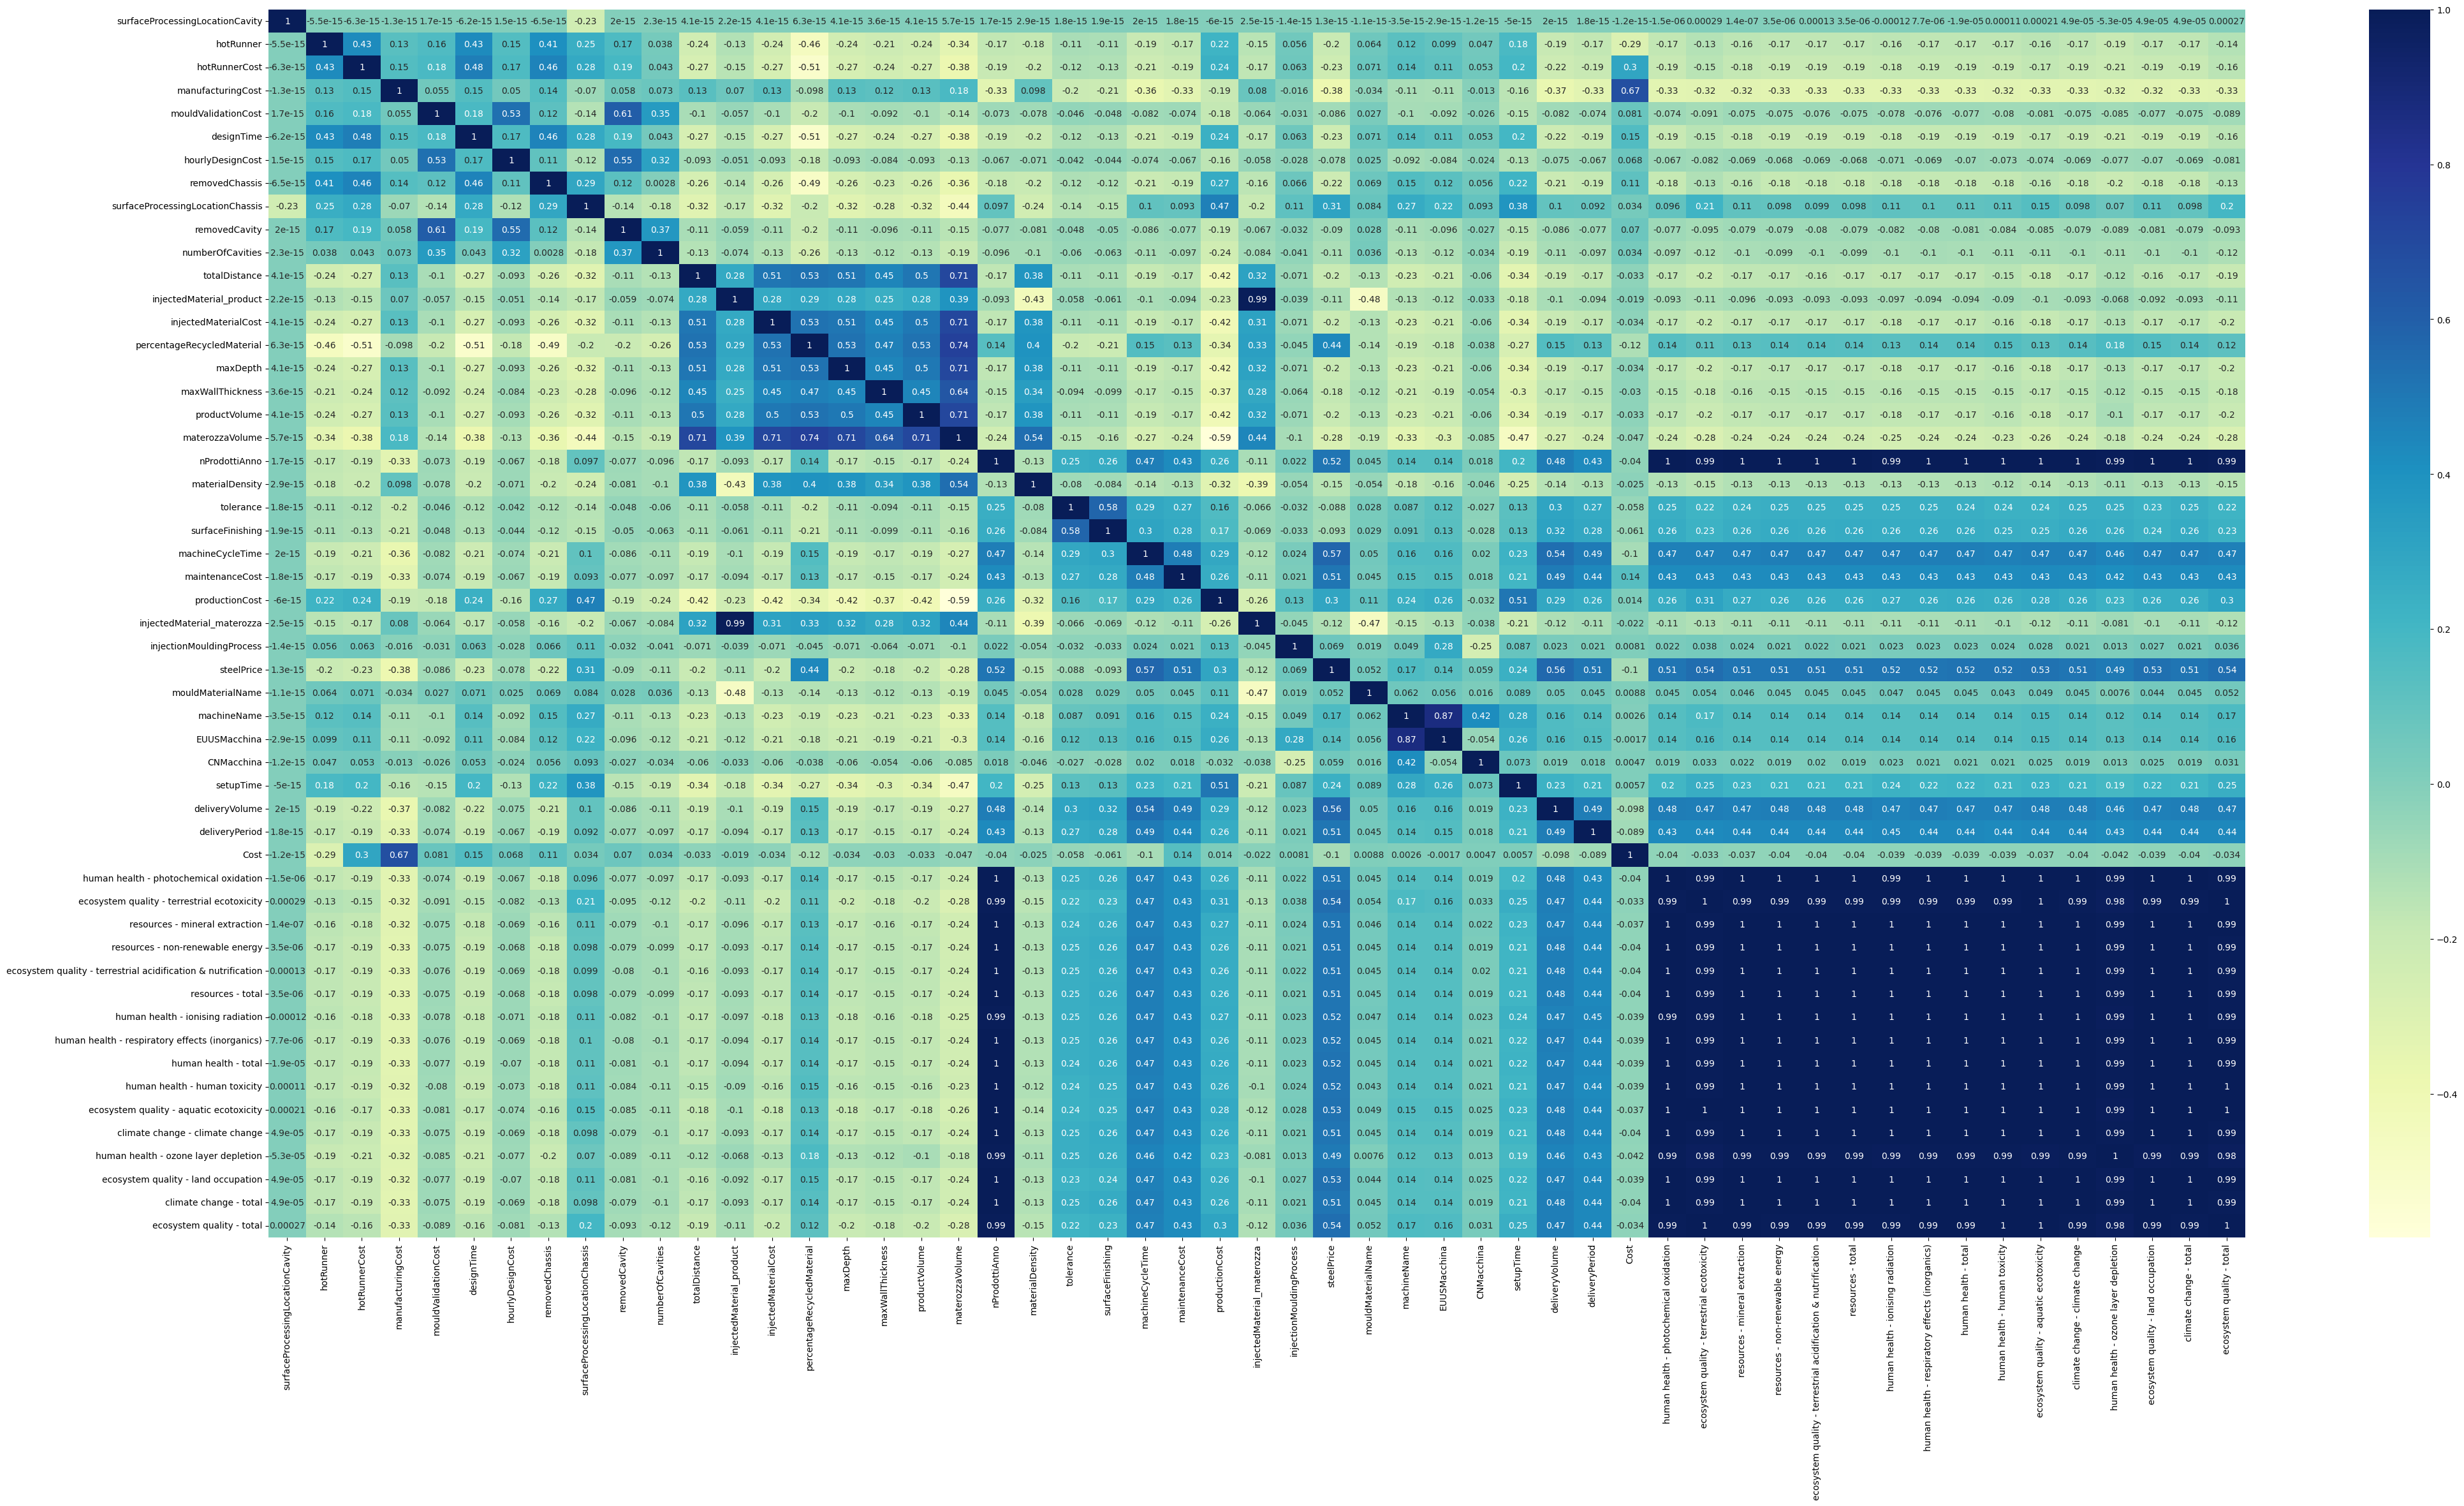

In [132]:
plt.figure(figsize = (50,25))
sns.heatmap(data=cleaned_corr_matrix, cmap="YlGnBu", annot=True)

In [133]:
data=cleaned_corr_matrix
cleaned_data = data.loc[~(data <= 0.1).all(axis=1), ~(data <= 0.1).all(axis=0)]

print(cleaned_data)

                                                    surfaceProcessingLocationCavity  \
surfaceProcessingLocationCavity                                        1.000000e+00   
hotRunner                                                             -5.515879e-15   
hotRunnerCost                                                         -6.300916e-15   
manufacturingCost                                                     -1.268297e-15   
mouldValidationCost                                                    1.706269e-15   
designTime                                                            -6.248216e-15   
hourlyDesignCost                                                       1.506888e-15   
removedChassis                                                        -6.548520e-15   
surfaceProcessingLocationChassis                                      -2.337491e-01   
removedCavity                                                          1.976259e-15   
numberOfCavities                           

<Axes: >

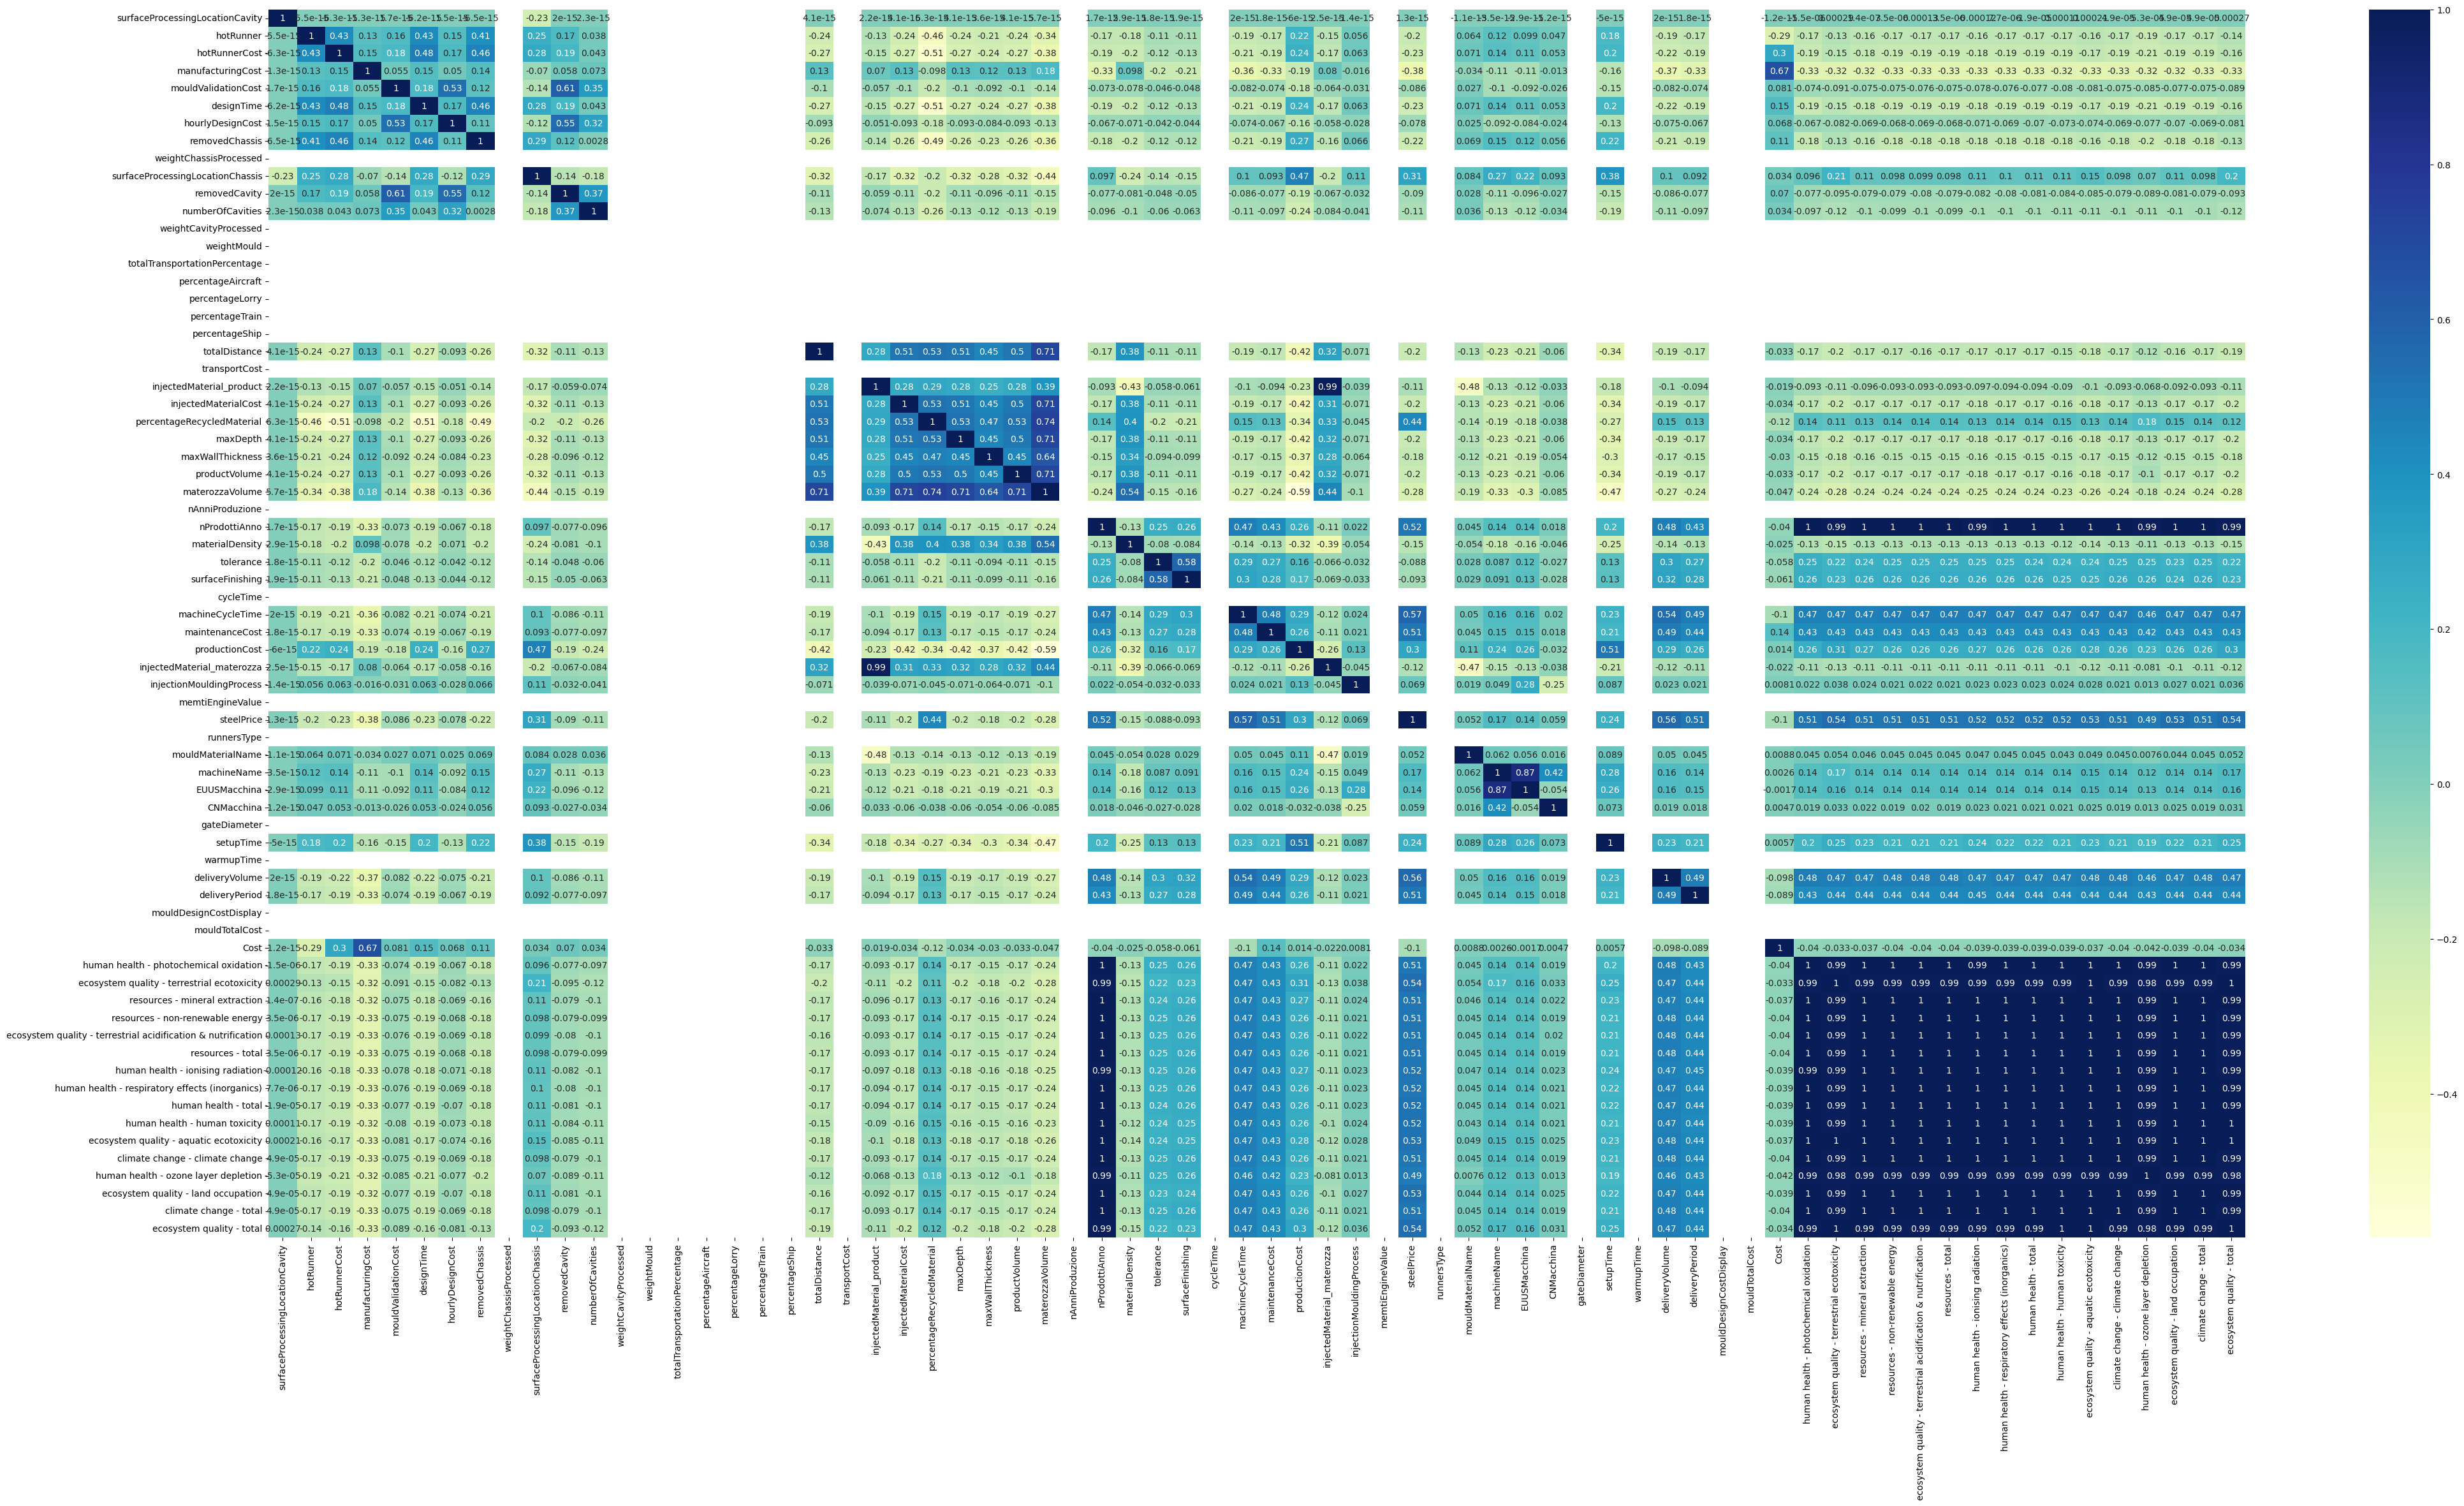

In [129]:
plt.figure(figsize = (50,25))
sns.heatmap(data=data, cmap="YlGnBu", annot=True)